In [108]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('drive/My Drive/Colab Notebooks/kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [111]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [112]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

**preprocessing**

In [130]:
df_train = df_train.dropna()
df_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038,0.0
1,0.000003,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0
2,0.000010,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0
3,0.000017,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.037402,0.932099,0.557093,0.0
4,0.000028,1.0,0.000000,1.0,0.153846,1.0,0.5,1.0,0.052380,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
171063,0.999986,1.0,0.046154,1.0,0.076923,1.0,0.5,1.0,0.043454,0.932099,0.716263,0.0
171064,0.999990,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.078239,0.932099,0.138408,0.0
171065,0.999993,1.0,0.046154,1.0,0.961538,1.0,0.5,1.0,0.087661,0.932099,0.747405,0.0
171066,0.999997,0.0,0.738462,1.0,0.134615,1.0,0.0,1.0,0.051853,0.759259,0.899654,0.0


In [114]:
#encode
import numpy as np
from sklearn.preprocessing import LabelEncoder
#jenis kelamin
LE = LabelEncoder()
df_train['Jenis_Kelamin'] = LE.fit_transform(df_train['Jenis_Kelamin'])
print(LE.classes_)
print(np.sort(df_train['Jenis_Kelamin'].unique()))
print('')

#umur kendaraan
LE = LabelEncoder()
df_train['Umur_Kendaraan'] = LE.fit_transform(df_train['Umur_Kendaraan'])
print(LE.classes_)
print(np.sort(df_train['Umur_Kendaraan'].unique()))
print('')

#kendaraan rusak
LE = LabelEncoder()
df_train['Kendaraan_Rusak'] = LE.fit_transform(df_train['Kendaraan_Rusak'])
print(LE.classes_)
print(np.sort(df_train['Kendaraan_Rusak'].unique()))
print('')


['Pria' 'Wanita']
[0 1]

['1-2 Tahun' '< 1 Tahun' '> 2 Tahun']
[0 1 2]

['Pernah' 'Tidak']
[0 1]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

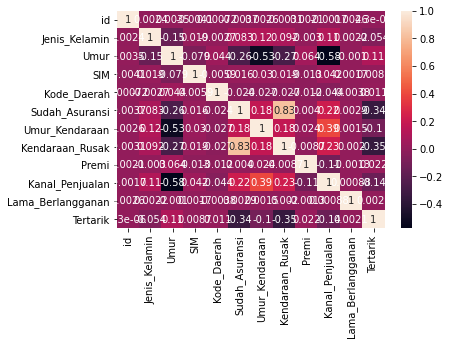

In [115]:
#check correlation
sns.heatmap(df_train.corr(), vmax=1, annot=True)

In [116]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train))
df_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038,0.0
1,0.000003,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111,0.0
2,0.000010,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391,0.0
3,0.000017,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.037402,0.932099,0.557093,0.0
4,0.000028,1.0,0.000000,1.0,0.153846,1.0,0.5,1.0,0.052380,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
171063,0.999986,1.0,0.046154,1.0,0.076923,1.0,0.5,1.0,0.043454,0.932099,0.716263,0.0
171064,0.999990,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.078239,0.932099,0.138408,0.0
171065,0.999993,1.0,0.046154,1.0,0.961538,1.0,0.5,1.0,0.087661,0.932099,0.747405,0.0
171066,0.999997,0.0,0.738462,1.0,0.134615,1.0,0.0,1.0,0.051853,0.759259,0.899654,0.0


**Pemodelan**

In [117]:
import random as rd

In [118]:
X = df_train.iloc[:, [2, 10]].values

In [119]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. 
n_iter=5

In [120]:
K=5 # number of clusters

In [121]:
Centroids=np.array([]).reshape(n,0) 

In [122]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [123]:
Output={}

In [124]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

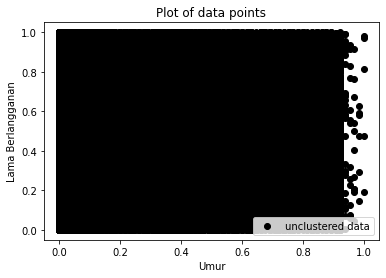

In [129]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.legend()
plt.title('Plot of data points')
plt.show()

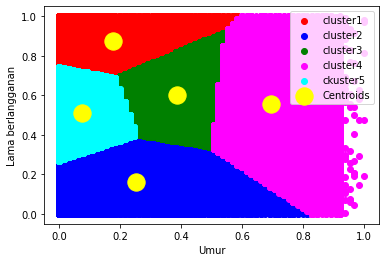

In [126]:
color=['red','blue','green','magenta','cyan']
labels=['cluster1','cluster2','cluster3','cluster4','ckuster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Umur')
plt.ylabel('Lama berlangganan')
plt.legend()
plt.show()

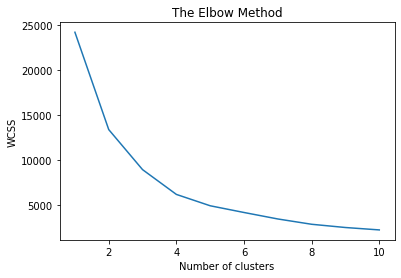

In [127]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()